In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 데이터 업로드
from google.colab import files
files.upload();

df = pd.read_csv('jejulatlng.csv')
df

Saving jejulatlng.csv to jejulatlng (2).csv


,Unnamed: 0,Name,Score,Review,Link,Addr,area,lat,lng
0,0,울트라마린,4.50,444,https://place.map.kakao.com/1915903142,\n제주특별자치도 제주시 한경면 일주서로 4611 지하1층\n(지번) 한경면 판포리...,hangyeong,33.369384,126.206171
1,1,클랭블루,4.50,495,https://place.map.kakao.com/1313144249,\n제주특별자치도 제주시 한경면 한경해안로 552-22\n(지번) 한경면 신창리 1...,hangyeong,33.332872,126.169798
2,2,우호적무관심,4.00,130,https://place.map.kakao.com/615161662,\n제주특별자치도 제주시 한경면 저지12길 103\n(지번) 한경면 저지리 2120...,hangyeong,33.339747,126.261347
3,3,하소로커피,4.70,49,https://place.map.kakao.com/2036344906,\n제주특별자치도 제주시 한경면 불그못로 72\n(지번) 한경면 조수리 4007-2\n,hangyeong,33.295562,126.217990
4,4,3인칭관찰자시점,3.16,139,https://place.map.kakao.com/1947663934,"\n제주특별자치도 제주시 한경면 신창7길 24 A, B동 1층\n(지번) 한경면 신...",hangyeong,33.349768,126.181319
...,...,...,...,...,...,...,...,...,...
1988,1988,라라카페 주차장,0.00,0,https://place.map.kakao.com/1747894670,\n제주특별자치도 제주시 애월읍 광령리 160-9\n\n,aewol,33.370172,126.481970
1989,1989,카페스탠포드,0.00,0,https://place.map.kakao.com/524099826,\n제주특별자치도 제주시 애월읍 애월해안로 408\n(지번) 애월읍 고내리 77\n,aewol,33.472559,126.352018
1990,1990,카페&아이스크림할인점 길역하귀점,0.00,0,https://place.map.kakao.com/1277962146,\n제주특별자치도 제주시 애월읍 일주서로 7229\n(지번) 애월읍 하귀1리 13\n,aewol,33.489837,126.420075
1991,1991,폴카페 전기차충전소,0.00,0,https://place.map.kakao.com/466866534,\n제주특별자치도 제주시 애월읍 하광로 208-22\n(지번) 애월읍 하귀1리 10...,aewol,33.469009,126.416674


In [25]:
df = df.iloc[:,1:]
df.columns

Index(['Name', 'Score', 'Review', 'Link', 'Addr', 'area', 'lat', 'lng'], dtype='object')

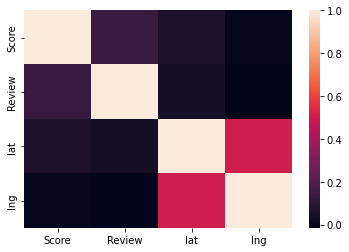

In [26]:
df.corr()
sns.heatmap(df.corr())

In [27]:
from sklearn.model_selection import train_test_split
X = df[['Score', 'lat', 'lng']]
y = df[['Review']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

features = ['Score','lat', 'lng'] # 세 개 피쳐
target = 'Review'


# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mae
# 39

# 테스트 데이터
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
round(mae,2) 
# 38.9


39.00254162583743

In [33]:
model.intercept_ # 절편
# 990.26

model.coef_ 
# 'Score', 'lat', 'lng' 의 회귀계수들
# array([[  5.73911407,  37.30153875, -17.56847843]])

array([[  5.73911407,  37.30153875, -17.56847843]])

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse
#6926.48

mae = mean_absolute_error(y_test, y_pred)
mae
# 38.9

rmse = np.sqrt(mse)
rmse
#83.23

r2 = r2_score(y_test, y_pred)
r2
# 0.03

0.026765357583253713

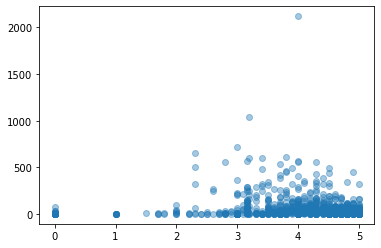

In [40]:
plt.scatter(df[['Score']], df[['Review']], alpha=0.4)
plt.show()